In [4]:
import pandas as pd
import numpy as np 
import matplotlib as plt

In [5]:
lp_df = pd.read_csv("/Users/ankushbharadwaj/Desktop/training-loan-prediction-av.csv")

In [6]:
lp_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
lp_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
##we can see that about 84% of applicants have credit history based on mean
##credit history value of 1 means they have it, 0 means they don't
##also, we can notice that there are definitely missing values in some of the instances

In [12]:
lp_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
lp_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
lp_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
lp_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
lp_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
lp_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [19]:
lp_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

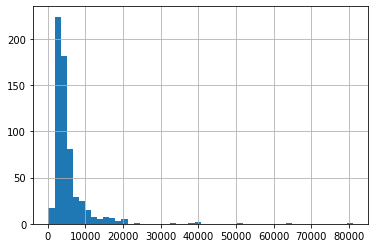

In [22]:
lp_df['ApplicantIncome'].hist(bins=50)

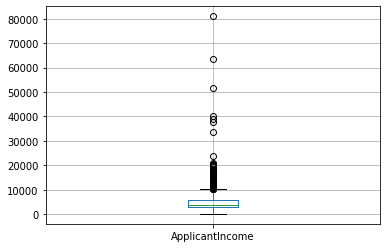

In [23]:
lp_df.boxplot(column='ApplicantIncome')

In [24]:
##above two confirm the presence of a TON of outliers
##gonna say this is because of the income disparity in society, primarily owing to education
##therefore, let's try filtering by education to see if this trend changes

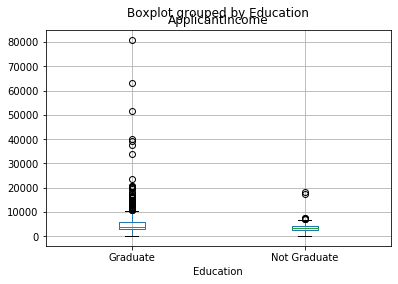

In [25]:
lp_df.boxplot(column='ApplicantIncome', by = 'Education')

In [26]:
##most of the outliers in the applicant income are from graduates with high income
##however, there is no substantial difference between mean income of graduate and not graduates

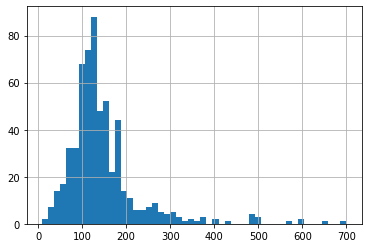

In [27]:
lp_df['LoanAmount'].hist(bins=50)

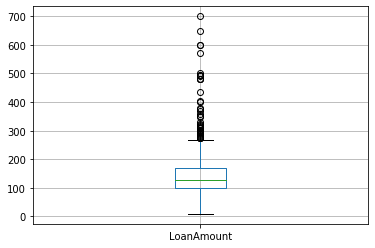

In [28]:
lp_df.boxplot(column='LoanAmount')

In [29]:
##again, we have a lot of extreme values in loan amount as well

In [31]:
temp1 = lp_df['Credit_History'].value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [33]:
temp2 = lp_df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [34]:
print('Frequency Table for Credit History:')
print(temp1)
print('\n')
print('Probability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [41]:
##from the above, we see that there is about an eight-fold chance of getting a loan if the applicant has a valid credit history
##let's visualize this frequency, then go through the other categorical variables

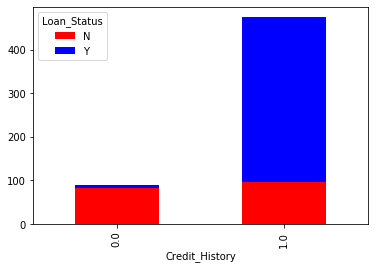

In [45]:
temp3 = pd.crosstab(lp_df['Credit_History'], lp_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

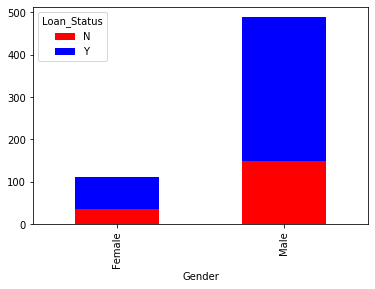

In [46]:
temp3 = pd.crosstab(lp_df['Gender'], lp_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [48]:
temp1 = lp_df['Gender'].value_counts(ascending=True)
temp2 = lp_df.pivot_table(values='Loan_Status', index=['Gender'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Gender:')
print(temp1)
print('\n')
print('Probability of getting loan for each Gender:')
print(temp2)

Frequency Table for Gender:
Female    112
Male      489
Name: Gender, dtype: int64


Probability of getting loan for each Gender:
        Loan_Status
Gender             
Female     0.669643
Male       0.693252


In [49]:
##alright so similar chances by gender for getting a loan

Frequency Table for Married:
No     213
Yes    398
Name: Married, dtype: int64


Probability of getting loan for each Married class:
         Loan_Status
Married             
No          0.629108
Yes         0.716080


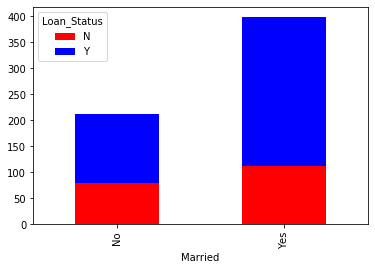

In [51]:
temp1 = lp_df['Married'].value_counts(ascending=True)
temp2 = lp_df.pivot_table(values='Loan_Status', index=['Married'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Married:')
print(temp1)
print('\n')
print('Probability of getting loan for each Married class:')
print(temp2)
temp3 = pd.crosstab(lp_df['Married'], lp_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [52]:
##ehhh married people have a slightly higher chance of getting their loans approved, but not drastically

Frequency Table for Dependents:
3+     51
2     101
1     102
0     345
Name: Dependents, dtype: int64


Probability of getting loan for each Dependents class:
            Loan_Status
Dependents             
0              0.689855
1              0.647059
2              0.752475
3+             0.647059


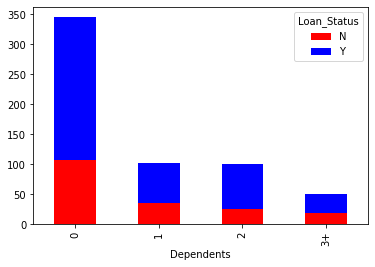

In [53]:
temp1 = lp_df['Dependents'].value_counts(ascending=True)
temp2 = lp_df.pivot_table(values='Loan_Status', index=['Dependents'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Dependents:')
print(temp1)
print('\n')
print('Probability of getting loan for each Dependents class:')
print(temp2)
temp3 = pd.crosstab(lp_df['Dependents'], lp_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [54]:
##apparently individuals with 2 dependents have the highest chance of getting a loan approved
##you'd think that more dependents based on the above trend => higher chance, but 3+ is tied for last

Frequency Table for Education:
Not Graduate    134
Graduate        480
Name: Education, dtype: int64


Probability of getting loan for each Education class:
              Loan_Status
Education                
Graduate         0.708333
Not Graduate     0.611940


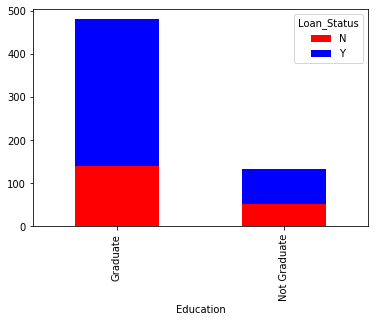

In [57]:
temp1 = lp_df['Education'].value_counts(ascending=True)
temp2 = lp_df.pivot_table(values='Loan_Status', index=['Education'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Education:')
print(temp1)
print('\n')
print('Probability of getting loan for each Education class:')
print(temp2)
temp3 = pd.crosstab(lp_df['Education'], lp_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [56]:
##it seems pretty logical that graduates have a higher chance of getting their loan approved than not graduates 

Frequency Table for Self_Employed:
Yes     82
No     500
Name: Self_Employed, dtype: int64


Probability of getting loan for each Self_Employed class:
               Loan_Status
Self_Employed             
No                0.686000
Yes               0.682927


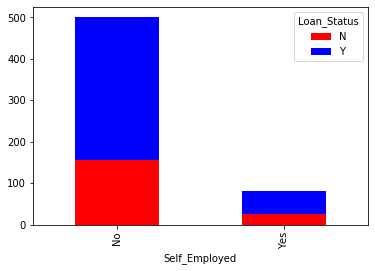

In [58]:
temp1 = lp_df['Self_Employed'].value_counts(ascending=True)
temp2 = lp_df.pivot_table(values='Loan_Status', index=['Self_Employed'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Self_Employed:')
print(temp1)
print('\n')
print('Probability of getting loan for each Self_Employed class:')
print(temp2)
temp3 = pd.crosstab(lp_df['Self_Employed'], lp_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [59]:
##honestly, I wasn't expecting any difference in rates for differences in people who are self_employed vs not and what we got here shows that

Frequency Table for Property_Area:
Rural        179
Urban        202
Semiurban    233
Name: Property_Area, dtype: int64


Probability of getting loan for each Property_Area class:
               Loan_Status
Property_Area             
Rural             0.614525
Semiurban         0.768240
Urban             0.658416


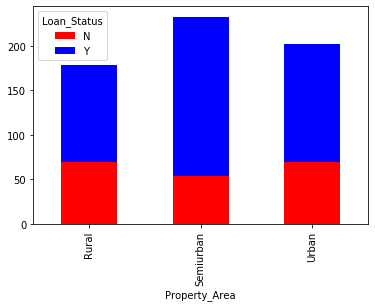

In [60]:
temp1 = lp_df['Property_Area'].value_counts(ascending=True)
temp2 = lp_df.pivot_table(values='Loan_Status', index=['Property_Area'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Property_Area:')
print(temp1)
print('\n')
print('Probability of getting loan for each Property_Area class:')
print(temp2)
temp3 = pd.crosstab(lp_df['Property_Area'], lp_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [61]:
## not really sure what these differences mean, but the chances of getting a loan approved from highest to lowest are as follows:
## semiurban, urban, rural

In [63]:
## let's see how many nulls/NaNs we have in the dataset
lp_df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [69]:
## let's now try to replace values in LoanAmount that make no sense, like 0
## going to do this by using the fact about whether or not someone is educated or self-employed to get a good estimate of the loan amount

In [72]:
## first we need to ensure that Self_Employed and Education don't have any missing values
lp_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [73]:
## so about 86% of the values of are No => we can impute some of the missing values as No:
lp_df['Self_Employed'].fillna('No', inplace = True)

In [74]:
lp_df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [75]:
lp_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [76]:
lp_df['Education'].fillna('Graduate', inplace = True)

In [77]:
lp_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [78]:
## oh sweet there were no missing values in 'Education'!

In [81]:
## we get the median values for all groups of unique values in Self_Employed and Education
## then we define a function which returns these values and applies it to fill in the missing values
table = lp_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
lp_df['LoanAmount'].fillna(lp_df[lp_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "DataFrame"

In [82]:
lp_df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
## okay so the reason that previous one failed is because I already filled it with means
lp_df = pd.read_csv("/Users/ankushbharadwaj/Desktop/training-loan-prediction-av.csv")

In [85]:
lp_df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
lp_df['Self_Employed'].fillna('No', inplace = True)

In [87]:
table = lp_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
lp_df['LoanAmount'].fillna(lp_df[lp_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [88]:
lp_df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

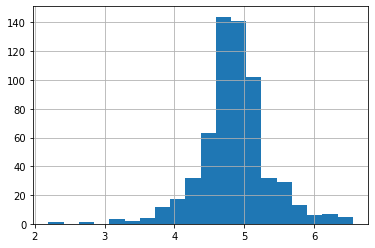

In [89]:
## we have outliers in LoanAmount that we noticed before, but we can't just get rid of those values because they might relate to specific people's circumstances
## let's first try a log transformation to nullify their effect
lp_df['LoanAmount_log'] = np.log(lp_df['LoanAmount'])
lp_df['LoanAmount_log'].hist(bins=20)

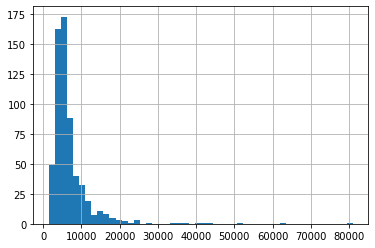

In [90]:
## ApplicantIncome is also plagued with outliers
## some applicants might come from lower income but have strong co-applicants
## let's combine both incomes into a total income first
lp_df['TotalIncome'] = lp_df['ApplicantIncome'] + lp_df['CoapplicantIncome']
lp_df['TotalIncome'].hist(bins=50)

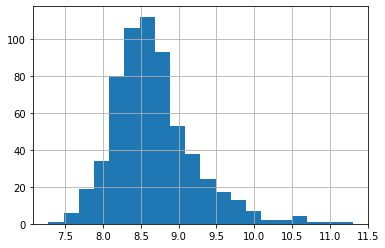

In [91]:
## whoops, still dumb skewed, let's try a log transofmration again
lp_df['TotalIncome_log'] = np.log(lp_df['TotalIncome'])
lp_df['TotalIncome_log'].hist(bins=20)

In [93]:
## want to go back and clean up missing values for other variables
lp_df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [94]:
lp_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [95]:
## about 80% of the gender values are male, so let's just make any missing values male
lp_df['Gender'].fillna('Male', inplace = True)

In [96]:
lp_df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [97]:
lp_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [98]:
## close enough such that we will fill in the first two missing elements with Yes and the last one with No
lp_df['Married'].fillna('Yes', inplace = True, limit = 2)
lp_df['Married'].fillna('No', inplace = True)

In [99]:
lp_df['Married'].value_counts()

Yes    400
No     214
Name: Married, dtype: int64

In [100]:
lp_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [101]:
## owing to the ratios, we'll fill it in according to this:
## 9 spots for 0, 3 spots for 1, 3 spots for 2
lp_df['Dependents'].fillna('0', inplace = True, limit = 9)
lp_df['Dependents'].fillna('1', inplace = True, limit = 3)
lp_df['Dependents'].fillna('2', inplace = True, limit = 3)

In [102]:
lp_df['Dependents'].value_counts()

0     354
1     105
2     104
3+     51
Name: Dependents, dtype: int64

In [104]:
## for loan_amount_term, let's just fill it in with the mean
lp_df['Loan_Amount_Term'].fillna(lp_df['Loan_Amount_Term'].mean(), inplace = True)

In [105]:
lp_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [106]:
## 84% chance to have a valid credit history => go ahead and fill missing values with 1
lp_df['Credit_History'].fillna(1.0, inplace = True)

In [107]:
lp_df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [108]:
## perfect, now we're good for building a predictive model 

In [112]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    lp_df[i] = le.fit_transform(lp_df[i])
lp_df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [131]:
from sklearn.linear_model import LogisticRegression
## from sklearn.model_selection import KFold  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data[predictors]):
    train_predictors = (data[predictors].iloc[train,:])
    
    train_target = data[outcome].iloc[train]
    
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 

In [133]:
outcome_var = 'Loan_Status'
model = LogisticRegression(solver='lbfgs')
predictor_var = ['Credit_History']
classification_model(model, lp_df, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [135]:
## after the above results, we want a better modeling technique
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, lp_df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [136]:
## let's try to try some numerical variables to base the model on instead
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, lp_df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.211%


In [137]:
## well accuracy went up but cross-validation error went down
## might be becasue of the model over-fitting the data, so let's try a more sophisticated algorithm

In [138]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, lp_df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.525%


In [139]:
## accuracy of 100% shows that there is definite overfitting
## let's reduce the number of predictors by first seeing which features are the most important
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.266330
TotalIncome_log     0.260887
LoanAmount_log      0.227438
Dependents          0.053114
Property_Area       0.052462
Loan_Amount_Term    0.045588
Married             0.027911
Self_Employed       0.022713
Education           0.022591
Gender              0.020967
dtype: float64


In [140]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, lp_df,predictor_var,outcome_var)

Accuracy : 82.736%
Cross-Validation Score : 80.297%


In [144]:
## yeah, that's more like it